1. Find maximum temperature in each of the cities

In [2]:
import numpy as np
import pandas as pd

In [4]:
city_df = pd.read_csv('data/city_mausam.csv')
city_df

,day,temperature,windspeed,event,Humidity,city
0,20/3/2024,46,57,Sunny,54,vasai
1,21/3/2024,36,54,Rain,53,nsp
2,22/3/2024,43,74,Snow,34,vasai
3,23/3/2024,46,57,Sunny,34,virar
4,24/3/2024,36,54,Rain,53,vasai
5,25/3/2024,43,74,Cloudy,57,nsp
6,25/3/2024,56,67,Cloudy,47,virar
7,26/3/2024,65,45,Rain,53,nsp
8,27/3/2024,23,32,Snow,31,virar


# SELECT * from city_df GROUP BY 'city';
This query is similar to below groupby function and storing to g.

In [7]:
g = city_df.groupby('city') 

for city_name, city_data in g:
   print(f"\n\n{city_name} \n{city_data}")



nsp 
         day  temperature  windspeed   event  Humidity city
1  21/3/2024           36         54    Rain        53  nsp
5  25/3/2024           43         74  Cloudy        57  nsp
7  26/3/2024           65         45    Rain        53  nsp


vasai 
         day  temperature  windspeed  event  Humidity   city
0  20/3/2024           46         57  Sunny        54  vasai
2  22/3/2024           43         74   Snow        34  vasai
4  24/3/2024           36         54   Rain        53  vasai


virar 
         day  temperature  windspeed   event  Humidity   city
3  23/3/2024           46         57   Sunny        34  virar
6  25/3/2024           56         67  Cloudy        47  virar
8  27/3/2024           23         32    Snow        31  virar


To get a specific dataframe with its key value

In [8]:
g.get_group('nsp')

,day,temperature,windspeed,event,Humidity,city
1,21/3/2024,36,54,Rain,53,nsp
5,25/3/2024,43,74,Cloudy,57,nsp
7,26/3/2024,65,45,Rain,53,nsp


In [9]:
g.max()

,day,temperature,windspeed,event,Humidity
city,,,,,
nsp,26/3/2024,65,74,Rain,57
vasai,24/3/2024,46,74,Sunny,54
virar,27/3/2024,56,67,Sunny,47


In [13]:
g.mean(numeric_only=True)

,temperature,windspeed,Humidity
city,,,
nsp,48.000000,57.666667,54.333333
vasai,41.666667,61.666667,47.000000
virar,41.666667,52.000000,37.333333


In [14]:
g.describe()

temperature                                                      \
            count       mean        std   min   25%   50%   75%   max   
city                                                                    
nsp           3.0  48.000000  15.132746  36.0  39.5  43.0  54.0  65.0   
vasai         3.0  41.666667   5.131601  36.0  39.5  43.0  44.5  46.0   
virar         3.0  41.666667  16.921387  23.0  34.5  46.0  51.0  56.0   

      windspeed             ...             Humidity                        \
          count       mean  ...   75%   max    count       mean        std   
city                        ...                                              
nsp         3.0  57.666667  ...  64.0  74.0      3.0  54.333333   2.309401   
vasai       3.0  61.666667  ...  65.5  74.0      3.0  47.000000  11.269428   
virar       3.0  52.000000  ...  62.0  67.0      3.0  37.333333   8.504901   

                                     
        min   25%   50%   75%   max  
city                                 
nsp    53.0  53.0  53.0  55.0  57.0  
vasai  34.0  43.5  53.0  53.5  54.0  
virar  31.0  32.5  34.0  40.5  47.0  

[3 rows x 24 columns]

In [16]:
g.describe(exclude=[int])

day                        event                   
      count unique        top freq count unique    top freq
city                                                       
nsp       3      3  21/3/2024    1     3      2   Rain    2
vasai     3      3  20/3/2024    1     3      3  Sunny    1
virar     3      3  23/3/2024    1     3      3  Sunny    1

In [25]:
g.describe(percentiles=[0.15, 0.30])

temperature                                                      \
            count       mean        std   min   15%   30%   50%   max   
city                                                                    
nsp           3.0  48.000000  15.132746  36.0  38.1  40.2  43.0  65.0   
vasai         3.0  41.666667   5.131601  36.0  38.1  40.2  43.0  46.0   
virar         3.0  41.666667  16.921387  23.0  29.9  36.8  46.0  56.0   

      windspeed             ...             Humidity                        \
          count       mean  ...   50%   max    count       mean        std   
city                        ...                                              
nsp         3.0  57.666667  ...  54.0  74.0      3.0  54.333333   2.309401   
vasai       3.0  61.666667  ...  57.0  74.0      3.0  47.000000  11.269428   
virar       3.0  52.000000  ...  57.0  67.0      3.0  37.333333   8.504901   

                                     
        min   15%   30%   50%   max  
city                                 
nsp    53.0  53.0  53.0  53.0  57.0  
vasai  34.0  39.7  45.4  53.0  54.0  
virar  31.0  31.9  32.8  34.0  47.0  

[3 rows x 24 columns]

city
nsp      Axes(0.125,0.11;0.775x0.77)
vasai    Axes(0.125,0.11;0.775x0.77)
virar    Axes(0.125,0.11;0.775x0.77)
dtype: object

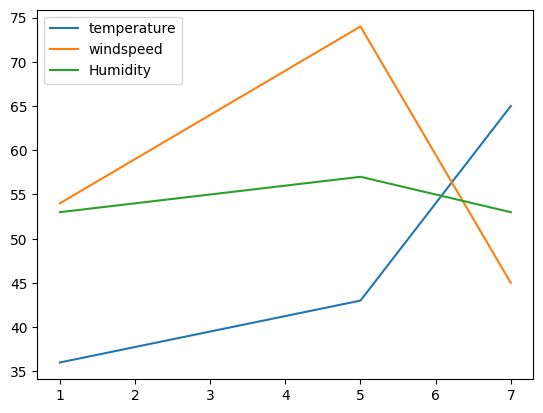

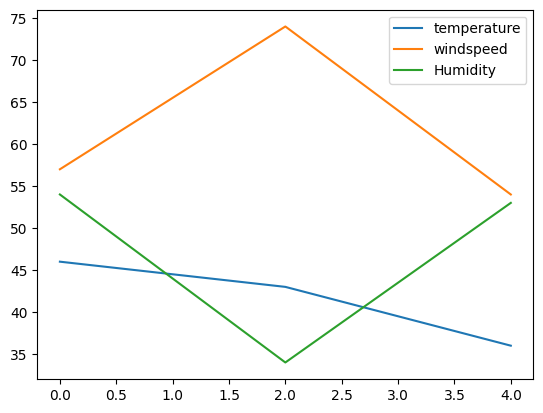

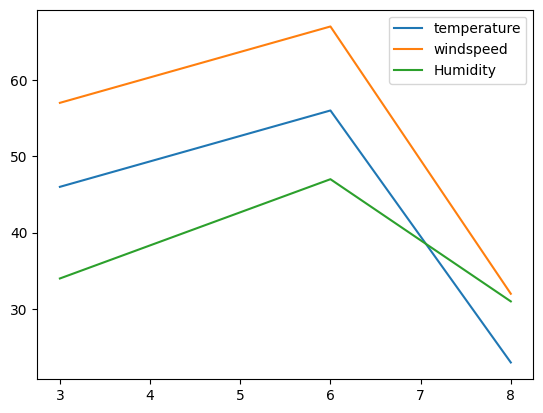

In [27]:
%matplotlib inline

g.plot()

2. find agerage wind speed per city
